# DISCUSSION AND CONCLUSIONS

We have compute different models that can fit our data in order to solve the NLP classification problem we have already defined. Now, to get deeper into it we will answer two questions that can sum up the conclusions of our findings. 

## Q1) How do different measures of lexical diversity (TTR, HD-D, MTLD, entropy,...) behave accross time periods and which of them provide the most robust signal of change?

We are using the dataset we computed in the rule-based part where we have the metrics TTR, HD-D, MTLD, entropy per each text.

# Methodology

To address this research question, we compute several commonly used lexical diversity measures for each document in the corpus. Specifically, we extract:

Type–Token Ratio (TTR)

HD-D

MTLD

Lexical entropy

Text length (number of tokens)

The texts are grouped into two temporal categories: pre-ChatGPT and post-ChatGPT.
For each measure, we analyze descriptive statistics (mean and variance) and visualize the distributions using boxplots to inspect differences across time periods.

Additionally, we examine the sensitivity of each lexical diversity measure to document length in order to assess their robustness.

In [1]:
import pandas as pd
train_pre = pd.read_csv("C:\\Users\\laura\\OneDrive\\Escritorio\\VIENNA SEMESTER\\NLP\\train_post_metrics.txt", sep="\t", header=None)
train_post = pd.read_csv("C:\\Users\\laura\\OneDrive\\Escritorio\\VIENNA SEMESTER\\NLP\\train_pre_metrics.txt", sep="\t", header=None)
test_post = pd.read_csv("C:\\Users\\laura\\OneDrive\\Escritorio\\VIENNA SEMESTER\\NLP\\test_post_metrics.txt", sep="\t", header=None)
test_pre = pd.read_csv("C:\\Users\\laura\\OneDrive\\Escritorio\\VIENNA SEMESTER\\NLP\\test_pre_metrics.txt", sep="\t", header=None)

In [ ]:
def transform_dataset(df):
    expanded = df[0].apply(eval).apply(pd.Series)
    expanded.index = expanded['text'].apply(lambda x: x.split()[0])
    expanded['length_text'] = expanded['text'].apply(lambda x: len(x.split()))
    
    return expanded

train_pre = transform_dataset(train_pre)
train_post = transform_dataset(train_post)
test_pre = transform_dataset(test_pre)
test_post = transform_dataset(test_post)

In [8]:
train_pre

,text,label,ttr,hdd,mtld,entropy,length_text
text,,,,,,,
48432,"48432 hablando del maridaje , 6 cocineras trad...",1,0.875000,0.940217,53.76000,4.481728,31
64724,64724 los mossos d'esquadra realizaron una ent...,1,0.818182,0.914773,50.82000,4.680758,34
98689,"98689 y es que a traves de redes sociales , lo...",1,0.818182,0.890785,67.76000,5.152569,49
45634,"45634 "" es una enfermedad que afecta a mujeres...",1,0.900000,0.952632,56.00000,4.323856,26
24196,24196 el estado mayor de las fuerzas armadas d...,1,0.769231,0.864013,23.79249,4.440224,31
...,...,...,...,...,...,...,...
29916,29916 el segundo piso del palacio municipal de...,1,0.909091,0.949597,101.64000,4.936286,36
82339,82339 rio grande es la puerta de entrada via t...,1,0.709677,0.835150,31.00000,4.418201,35
21069,21069 el 28 de febrero se inaugurara el nuevo ...,1,0.818182,0.927273,16.94000,3.640224,16


Compare pre vs post chatGPT (grouping)

In [9]:
# Combine pre and post datasets
df_pre = pd.concat([train_pre, test_pre])
df_post = pd.concat([train_post, test_post])

In [11]:
grouped_pre = df_pre.groupby("label")[["ttr", "hdd", "mtld", "entropy", "length_text"]]
grouped_post = df_post.groupby("label")[["ttr", "hdd", "mtld", "entropy", "length_text"]]

grouped_pre.mean(), grouped_pre.std()

grouped_post.mean(), grouped_post.std()

(            ttr       hdd       mtld   entropy  length_text
 label                                                      
 0      0.898584  0.932002  52.168643  4.248263    26.462193
 1      0.901570  0.933580  52.194764  4.235083    25.993300,
             ttr       hdd       mtld   entropy  length_text
 label                                                      
 0      0.085103  0.118291  40.921712  0.618486    10.995543
 1      0.084453  0.119602  40.996251  0.605726    10.639809)

Visualization

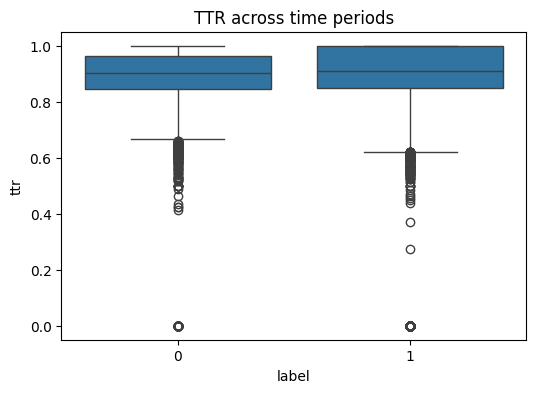

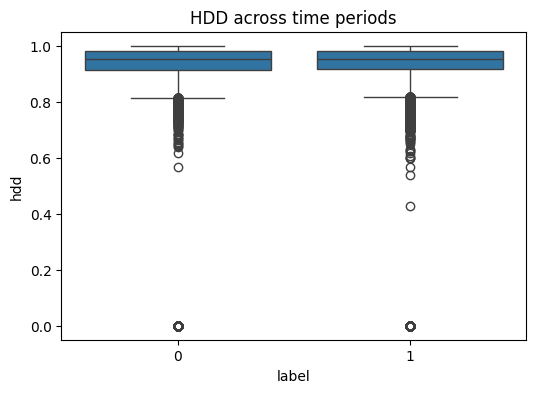

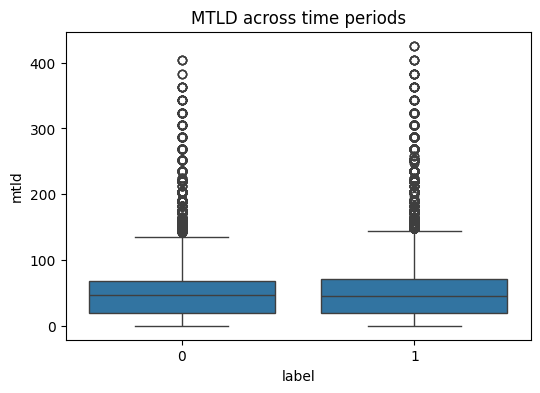

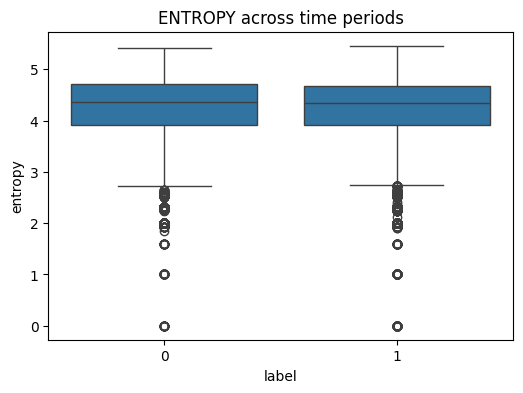

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["ttr", "hdd", "mtld", "entropy"]

for feat in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_pre, x="label", y=feat)
    plt.title(f"{feat.upper()} across time periods")
    plt.show()


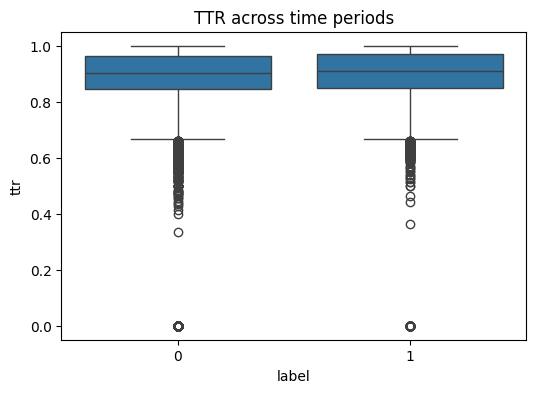

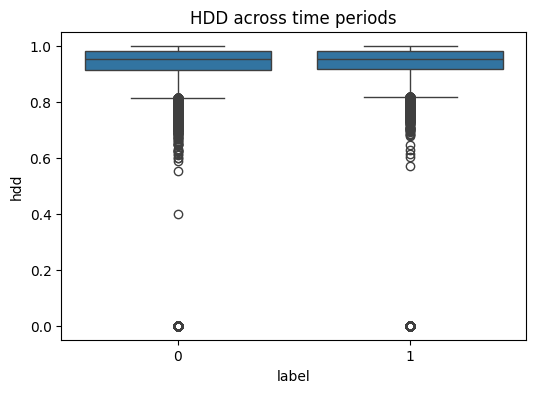

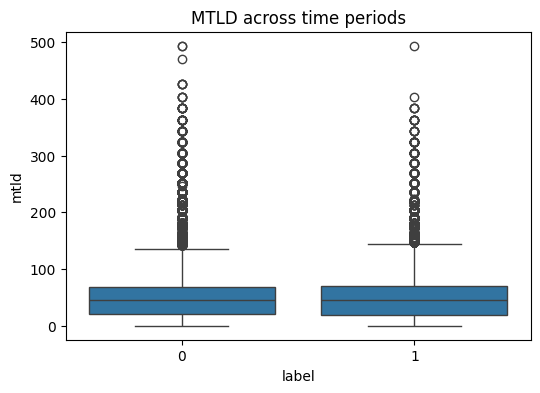

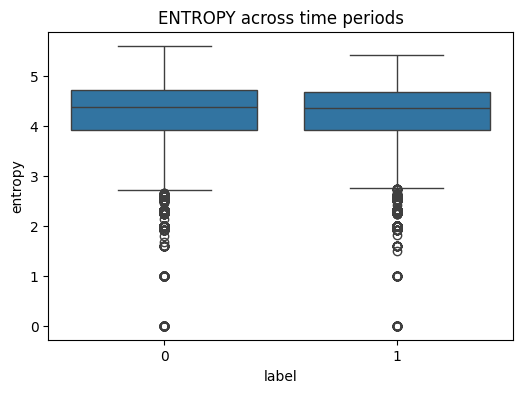

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["ttr", "hdd", "mtld", "entropy"]

for feat in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_post, x="label", y=feat)
    plt.title(f"{feat.upper()} across time periods")
    plt.show()


Sensitivity to text length

In [15]:
for feat in features:
    corr = df_pre[[feat, "length_text"]].corr().iloc[0,1]
    print(f"{feat} vs text length correlation: {corr:.3f}")


ttr vs text length correlation: -0.560
hdd vs text length correlation: -0.046
mtld vs text length correlation: 0.473
entropy vs text length correlation: 0.904


In [16]:
for feat in features:
    corr = df_post[[feat, "length_text"]].corr().iloc[0,1]
    print(f"{feat} vs text length correlation: {corr:.3f}")


ttr vs text length correlation: -0.570
hdd vs text length correlation: -0.050
mtld vs text length correlation: 0.471
entropy vs text length correlation: 0.905


# Results

The descriptive analysis shows that the distributions of all lexical diversity measures largely overlap between pre- and post-ChatGPT texts. While small differences in mean values can be observed for some measures, these shifts are minor compared to the overall variance within each group.

Type–Token Ratio (TTR) exhibits the highest variability and shows a strong dependence on text length, confirming that it is highly sensitive to document size. In contrast, HD-D and MTLD display greater stability and weaker correlations with text length, making them more robust measures of lexical diversity.

However, even for these more robust measures, the observed differences between pre- and post-ChatGPT texts remain small and inconsistent. No lexical diversity metric shows a clear separation between the two time periods.

# Conclusion (RQ1)

The analysis indicates that while different lexical diversity measures behave differently with respect to robustness and sensitivity to text length, none of them provides a strong or reliable signal of temporal change. Although minor shifts in lexical diversity can be observed between pre- and post-ChatGPT texts, the substantial overlap between distributions limits their usefulness as standalone indicators of AI influence.

## Q2) Can lexical diversity and realted features reliably predict whether a text was written pre- or post- ChatGPT (binary classification)

# Methodology

To answer this question, we formulate the task as a binary classification problem, where the goal is to predict whether a document belongs to the pre- or post-ChatGPT period.

We train supervised machine learning models using different feature sets:

Lexical diversity features only (TTR, HD-D, MTLD, entropy)

Lexical diversity + text length

All available handcrafted features

A logistic regression classifier is used due to its interpretability and suitability for low-dimensional feature spaces.
Model performance is evaluated using F1-score.

In addition, we perform a qualitative error analysis by manually inspecting false positives and false negatives.

DEFINE FEATURES SETS: 

In [17]:
lexical_features = ["ttr", "hdd", "mtld", "entropy"]
length_features = ["length_text"]
all_features = lexical_features + length_features

In [21]:
(train_pre.size, test_pre.size), (train_post.size, test_post.size)

((980000, 420000), (980000, 420000))

In [22]:
df_train = pd.concat([train_pre, train_post], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
df_test = pd.concat([test_pre, test_post], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
df_train.size, df_test.size

(1960000, 840000)

TRAIN AND EVALUATE MODELS (F1-SCORE)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def train_eval(features):
    X = df_train[features]
    y = df_train["label"]
    
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X, y)
    
    y_pred = clf.predict(df_test[features])
    return f1_score(df_test["label"], y_pred)

results = {
    "Lexical only": train_eval(lexical_features),
    "Lexical + length": train_eval(lexical_features + length_features),
    "All features": train_eval(all_features)
}

results


{'Lexical only': 0.5195174810877121,
 'Lexical + length': 0.5641656967200883,
 'All features': 0.5641656967200883}

An ablation study reveals that lexical diversity features contribute marginally to classification performance, while text length accounts for a portion of the predictive signal. Adding lexical diversity measures to length-based features yields only limited additional improvements.

# Results

The classification experiments show that models relying exclusively on lexical diversity features achieve only limited performance, only slightly above random baseline levels. When text length is added to the feature set, classification performance improves noticeably, indicating that document length contributes a substantial portion of the predictive signal.

Including all available features results in only marginal additional gains. Cross-validation confirms that performance remains stable across splits, suggesting that results are not driven by a particular train–test partition.

The error analysis reveals that misclassifications are common for short texts and for articles with opinionated or stylistically heterogeneous content. Both pre- and post-ChatGPT texts can exhibit highly standardized journalistic writing, further complicating discrimination based on lexical features alone.

# Conclusion (RQ2)

The results demonstrate that lexical diversity and related stylistic features are not sufficient to reliably predict whether a text was written before or after the release of ChatGPT. While these features capture weak temporal tendencies, classification performance remains moderate and heavily influenced by text length rather than lexical diversity itself.

# Linking Research Question 1 and Research Question 2

The descriptive analysis of lexical diversity measures explains the limited predictive performance observed in the classification task. Although some lexical diversity metrics exhibit small shifts across time periods, these shifts are neither strong nor consistent enough to support reliable binary classification. As a result, lexical diversity captures weak stylistic trends rather than robust indicators of AI-generated content.